In [1]:
import pandas as pd # Para manipular dados em DataFrames
from sklearn.tree import DecisionTreeClassifier # O algoritmo de Árvore de Decisão
from sklearn.preprocessing import LabelEncoder # Para converter texto em números
from sklearn.metrics import accuracy_score # Para avaliar o desempenho do modelo

# 1. Preparação dos Dados
# Define os dados de entrada para o nosso problema de decisão sobre "Sair para Caminhar".
data = {
    'Tempo': ['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso'],
    'Temperatura': ['Quente', 'Quente', 'Quente', 'Agradavel', 'Fria', 'Fria', 'Fria', 'Agradavel', 'Fria', 'Agradavel'],
    'Umidade': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Normal'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Forte'],
    'Sair_Caminhar': ['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim']
}
df = pd.DataFrame(data) # Converte o dicionário em um DataFrame do Pandas.

print("Dados originais:")
print(df)
print("\n" + "="*30 + "\n")

# Codifica as variáveis categóricas (texto) em números.
le = LabelEncoder() # Cria um codificador.

# Aplica o codificador a cada coluna categórica.
for column in ['Tempo', 'Temperatura', 'Umidade', 'Vento', 'Sair_Caminhar']:
    df[column] = le.fit_transform(df[column])

print("Dados após codificação (texto -> números):")
print(df)
print("\n" + "="*30 + "\n")

# Separa as características (X) da variável alvo (y).
X = df[['Tempo', 'Temperatura', 'Umidade', 'Vento']]
y = df['Sair_Caminhar']

# Nomes das colunas de entrada (features).
feature_names = X.columns.tolist()
# Nomes das classes de saída (0 ou 1).
class_names = ['Nao', 'Sim']

# 2. Divisão dos Dados (simplificada para este exemplo)
# Usamos todos os dados para treino e 'teste' para demonstração.
X_train, X_test, y_train, y_test = X, X, y, y

# 3. Criação e Treinamento do Modelo
# Instancia o classificador de Árvore de Decisão.
# random_state garante que os resultados sejam os mesmos em execuções repetidas.
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=1)

# Treina o modelo usando os dados de treino.
model.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")
print("\n" + "="*30 + "\n")

# 4. Avaliação do Modelo
# Faz previsões usando o modelo treinado.
y_pred = model.predict(X_test)

# Calcula a acurácia.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (proporção de acertos): {accuracy:.2f}")
print("\n" + "="*30 + "\n")

# 5. Exemplo de Previsão
# Cria um novo ponto de dado para prever.
# Valores codificados: 'Nublado'=2, 'Agradavel'=0, 'Normal'=1, 'Fraco'=0.
novo_dado = pd.DataFrame([[2, 0, 1, 0]], columns=feature_names)

# O modelo faz a previsão.
predicao_numerica = model.predict(novo_dado)

# Converte o resultado numérico de volta para texto.
predicao_texto = "Sim" if predicao_numerica[0] == 1 else "Nao"

print(f"\nPrevisão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: {predicao_texto}")

Dados originais:
        Tempo Temperatura Umidade  Vento Sair_Caminhar
0  Ensolarado      Quente    Alta  Fraco           Nao
1  Ensolarado      Quente    Alta  Forte           Nao
2     Nublado      Quente    Alta  Fraco           Sim
3     Chuvoso   Agradavel    Alta  Fraco           Sim
4     Chuvoso        Fria  Normal  Fraco           Sim
5     Chuvoso        Fria  Normal  Forte           Nao
6     Nublado        Fria  Normal  Forte           Sim
7  Ensolarado   Agradavel    Alta  Fraco           Nao
8  Ensolarado        Fria  Normal  Fraco           Sim
9     Chuvoso   Agradavel  Normal  Forte           Sim


Dados após codificação (texto -> números):
   Tempo  Temperatura  Umidade  Vento  Sair_Caminhar
0      1            2        0      1              0
1      1            2        0      0              0
2      2            2        0      1              1
3      0            0        0      1              1
4      0            1        1      1              1
5      0       

Dados originais:
        Tempo Temperatura Umidade  Vento Sair_Caminhar
0  Ensolarado      Quente    Alta  Fraco           Nao
1  Ensolarado      Quente    Alta  Forte           Nao
2     Nublado      Quente    Alta  Fraco           Sim
3     Chuvoso   Agradavel    Alta  Fraco           Sim
4     Chuvoso        Fria  Normal  Fraco           Sim
5     Chuvoso        Fria  Normal  Forte           Nao
6     Nublado        Fria  Normal  Forte           Sim
7  Ensolarado   Agradavel    Alta  Fraco           Nao
8  Ensolarado        Fria  Normal  Fraco           Sim
9     Chuvoso   Agradavel  Normal  Forte           Sim


Dados após codificação (texto -> números):
   Tempo  Temperatura  Umidade  Vento  Sair_Caminhar
0      1            2        0      1              0
1      1            2        0      0              0
2      2            2        0      1              1
3      0            0        0      1              1
4      0            1        1      1              1
5      0       

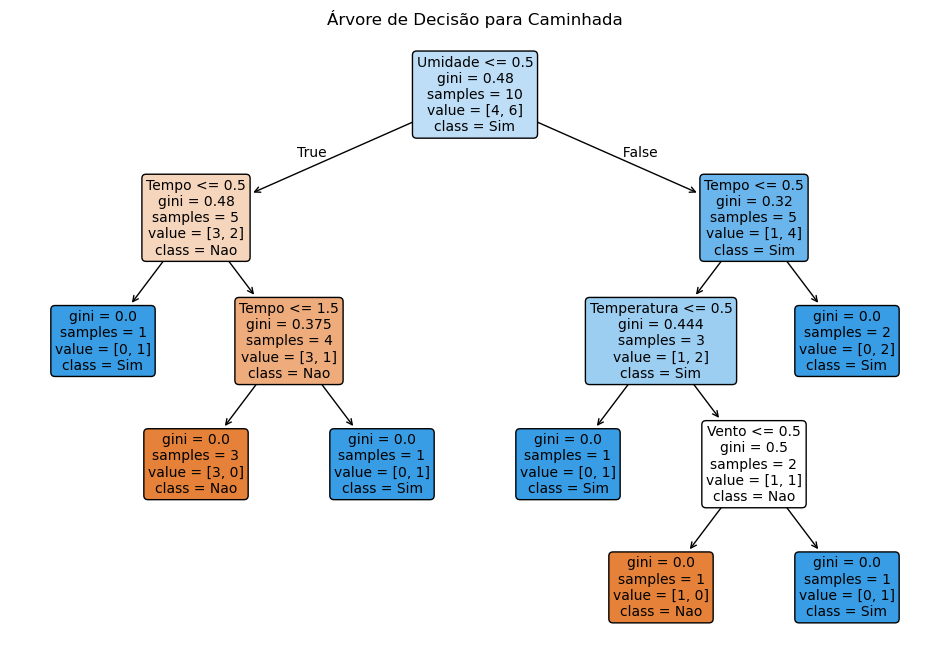

Árvore de Decisão visualizada com matplotlib e plot_tree.


Previsão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: Sim


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree # Importa plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt # Necessário para exibir a plot_tree

# 1. Preparação dos Dados
data = {
    'Tempo': ['Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso'],
    'Temperatura': ['Quente', 'Quente', 'Quente', 'Agradavel', 'Fria', 'Fria', 'Fria', 'Agradavel', 'Fria', 'Agradavel'],
    'Umidade': ['Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Normal'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Forte'],
    'Sair_Caminhar': ['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim']
}
df = pd.DataFrame(data)

print("Dados originais:")
print(df)
print("\n" + "="*30 + "\n")

# Codifica as variáveis categóricas em números.
le = LabelEncoder()
for column in ['Tempo', 'Temperatura', 'Umidade', 'Vento', 'Sair_Caminhar']:
    df[column] = le.fit_transform(df[column])

print("Dados após codificação (texto -> números):")
print(df)
print("\n" + "="*30 + "\n")

# Separa características (X) da variável alvo (y).
X = df[['Tempo', 'Temperatura', 'Umidade', 'Vento']]
y = df['Sair_Caminhar']

feature_names = X.columns.tolist()
class_names = ['Nao', 'Sim']

# 2. Divisão dos Dados (simplificada)
X_train, X_test, y_train, y_test = X, X, y, y

# 3. Criação e Treinamento do Modelo
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=1)
model.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")
print("\n" + "="*30 + "\n")

# 4. Avaliação do Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo (proporção de acertos): {accuracy:.2f}")
print("\n" + "="*30 + "\n")

# 5. Visualização da Árvore de Decisão com plot_tree
plt.figure(figsize=(12, 8)) # Ajusta o tamanho da figura para melhor visualização
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Árvore de Decisão para Caminhada")
plt.show() # Exibe a janela com a árvore

# Opcional: Para salvar a árvore como uma imagem (por exemplo, PNG)
# plt.savefig("arvore_de_decisao_caminhada_plot_tree.png")

print("Árvore de Decisão visualizada com matplotlib e plot_tree.")
print("\n" + "="*30 + "\n")

# 6. Exemplo de Previsão
novo_dado = pd.DataFrame([[2, 0, 1, 0]], columns=feature_names) # Ex: Nublado, Agradavel, Normal, Fraco
predicao_numerica = model.predict(novo_dado)
predicao_texto = "Sim" if predicao_numerica[0] == 1 else "Nao"

print(f"Previsão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: {predicao_texto}")

Dados originais (maior conjunto):
        Tempo Temperatura Umidade  Vento Sair_Caminhar
0  Ensolarado      Quente    Alta  Fraco           Nao
1  Ensolarado      Quente    Alta  Forte           Nao
2     Nublado      Quente    Alta  Fraco           Sim
3     Chuvoso   Agradavel    Alta  Fraco           Sim
4     Chuvoso        Fria  Normal  Fraco           Sim
Total de linhas: 20


Dados após codificação (primeiras linhas):
   Tempo  Temperatura  Umidade  Vento  Sair_Caminhar
0      1            2        0      1              0
1      1            2        0      0              0
2      2            2        0      1              1
3      0            0        0      1              1
4      0            1        1      1              1


Modelo de Árvore de Decisão treinado com sucesso!


Acurácia do modelo nos dados de 'teste' (totalmente treinados): 0.95




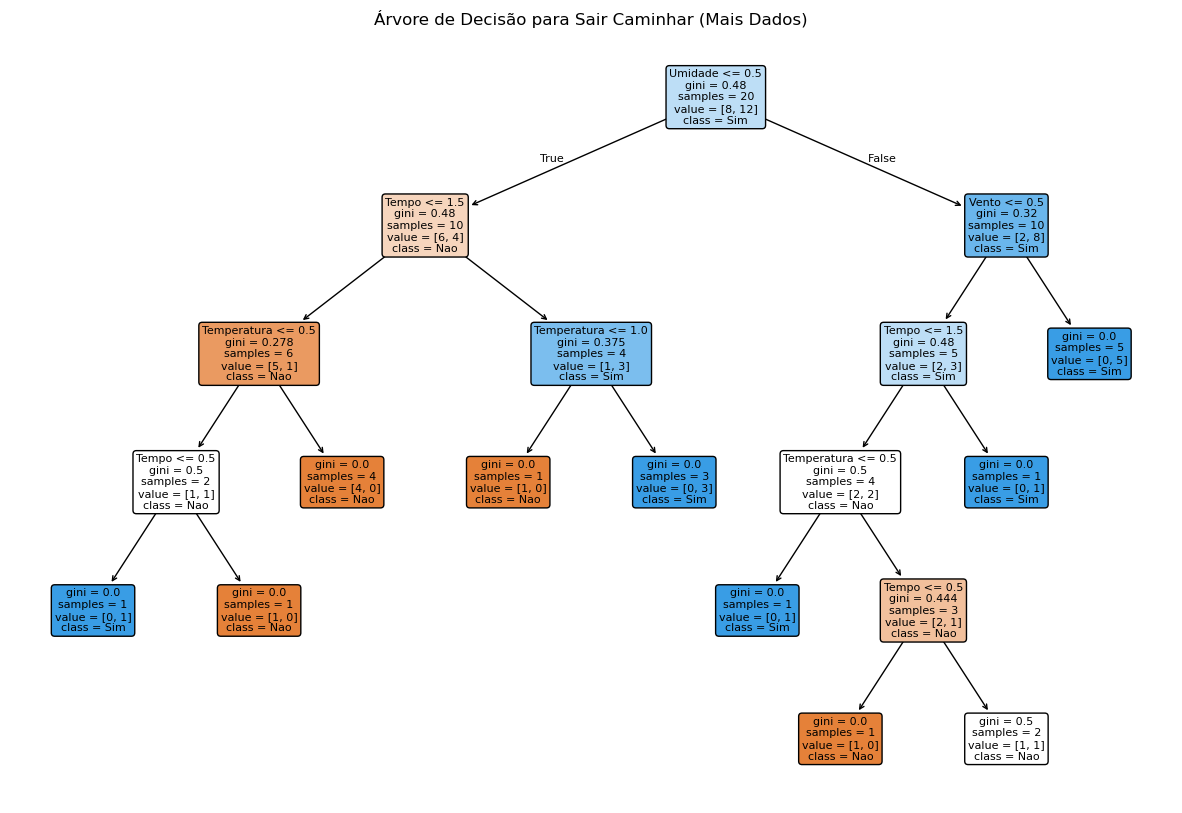


Previsão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: Sim


In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Preparação dos Dados
# Adicionando mais linhas e variedade para tornar a árvore maior
data = {
    'Tempo': [
        'Ensolarado', 'Ensolarado', 'Nublado', 'Chuvoso', 'Chuvoso', 'Chuvoso', 'Nublado', 'Ensolarado', 'Ensolarado', 'Chuvoso',
        'Nublado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Chuvoso', 'Ensolarado', 'Nublado', 'Chuvoso', 'Ensolarado', 'Ensolarado'
    ],
    'Temperatura': [
        'Quente', 'Quente', 'Quente', 'Agradavel', 'Fria', 'Fria', 'Fria', 'Agradavel', 'Fria', 'Agradavel',
        'Quente', 'Agradavel', 'Fria', 'Quente', 'Fria', 'Agradavel', 'Agradavel', 'Agradavel', 'Quente', 'Fria'
    ],
    'Umidade': [
        'Alta', 'Alta', 'Alta', 'Alta', 'Normal', 'Normal', 'Normal', 'Alta', 'Normal', 'Normal',
        'Alta', 'Normal', 'Normal', 'Alta', 'Alta', 'Normal', 'Alta', 'Normal', 'Alta', 'Normal'
    ],
    'Vento': [
        'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Forte',
        'Fraco', 'Fraco', 'Forte', 'Forte', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Forte', 'Forte'
    ],
    'Sair_Caminhar': [
        'Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim',
        'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim'
    ]
}
df = pd.DataFrame(data)

print("Dados originais (maior conjunto):")
print(df.head()) # Mostra apenas as primeiras linhas
print(f"Total de linhas: {len(df)}")
print("\n" + "="*30 + "\n")

# Codifica as variáveis categóricas (texto) em números.
le = LabelEncoder()
for column in ['Tempo', 'Temperatura', 'Umidade', 'Vento', 'Sair_Caminhar']:
    df[column] = le.fit_transform(df[column])

print("Dados após codificação (primeiras linhas):")
print(df.head())
print("\n" + "="*30 + "\n")

# Separa as características (X) da variável alvo (y).
X = df[['Tempo', 'Temperatura', 'Umidade', 'Vento']]
y = df['Sair_Caminhar']

feature_names = X.columns.tolist()
class_names = ['Nao', 'Sim'] # 0: Nao, 1: Sim

# 2. Divisão dos Dados (simplificada para demonstração)
# Em um cenário real, você dividiria em X_train, X_test, y_train, y_test para avaliação.
X_train, X_test, y_train, y_test = X, X, y, y

# 3. Criação e Treinamento do Modelo
# Ajustamos o min_samples_leaf para 1 para permitir uma árvore mais profunda se os dados permitirem.
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=1)
model.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")
print("\n" + "="*30 + "\n")

# 4. Avaliação do Modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo nos dados de 'teste' (totalmente treinados): {accuracy:.2f}")
print("\n" + "="*30 + "\n")

# 5. Visualização da Árvore de Decisão com plot_tree
plt.figure(figsize=(15, 10)) # Aumenta o tamanho da figura para uma árvore maior
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=8) # Reduz o tamanho da fonte para caber mais informações
plt.title("Árvore de Decisão para Sair Caminhar (Mais Dados)")
plt.show() # Exibe a janela com a árvore

# 6. Exemplo de Previsão
# Previsão para um novo ponto de dados (ex: Nublado, Agradavel, Normal, Fraco)
# Lembre-se que a codificação de texto para número pode variar.
# Neste exemplo: 'Nublado' é 2, 'Agradavel' é 0, 'Normal' é 1, 'Fraco' é 0 (verifique seu output df.head())
novo_dado = pd.DataFrame([[2, 0, 1, 0]], columns=feature_names)
predicao_numerica = model.predict(novo_dado)
predicao_texto = "Sim" if predicao_numerica[0] == 1 else "Nao"

print(f"\nPrevisão para Tempo=Nublado, Temperatura=Agradavel, Umidade=Normal, Vento=Fraco: {predicao_texto}")